# PRÁCTICA 02.
# Perceptrón Simple.
__Diseño__: Erika Lilian Castillo Gutiérrez

### OBJETIVO:

Que el alumno implemente el perceptrón simple y lo aplique en distintos conjuntos de datos aplicando variaciones en la forma de aprendizaje del perceptrón.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

import json, matplotlib
s = json.load( open("styles/bmh_matplotlibrc.json") )
matplotlib.rcParams.update(s)
from IPython.core.pylabtools import figsize
figsize(11, 5)
colores = ["#348ABD", "#A60628","#06A628"]

from ipywidgets import interact, interact_manual, interactive, fixed
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import random
### Remueve esta línea de código, pues agregarás tus propias funciones
#from perceptron.Perceptron import *
#from perceptron.minimos import *

### PERCEPTRÓN

Un perceptrón simple es una unidad computacional con un umbral $\theta$, que al recibir $X \text{ de }n$ entradas reales $X = x_1, x_2, \cdots, x_n$ a través de sus pesos asociados $W = w_1, w_2, \cdots, w_n$, da una salida de valor 1 si la desigualdad $\sum_{i=1}^{n}w_ix_i \geq \theta$ se cumple, en otro caso la salida es 0.

La ley de aprendizaje se define como: $w_i(t+1) = w_i (t) + \alpha · d(x) · x_i$


$$
\
d(x)= 
\begin{cases}
1, & \text{si } x \in A;\\
-1, & \text{si } x \in B
\end{cases}
\
$$

y $\alpha$ la tasa de aprendizaje. Los pesos no se modifican si $x$ está bien clasificado.

1.- Implementa la clase Perceptron que contenga lo siguiente:
   * Inicialización del perceptrón dados los pesos iniciales.
   * Función **evalua_escalon** que reciba X y evalúe la salida utilizando la función escalón en el intervalo [0,1].
   * Función **entrena**, debe entrenar al perceptrón: modificación de los pesos en una iteración cada que se llame a esta función dada una tasa de aprendizaje.
   
2.- Crea un *Perceptron* de pesos iniciales aleatorios y entrénalo con el conjunto de datos datosAND con inicialización de pesos aleatorios.
    
 * Completa la función **entrenaPerceptronAND** y utiliza tu función **entrena** para que en cada paso de entrenamiento se dibuje el conjunto de datos y el plano que divide al conjunto, tal como se muestra en la figura (utiliza colores para diferenciar al conjunto de datos)
 
 <img src="figuras/foo1.png">
 
HINT1: Recuerda que el vector de pesos W contiene el vector normal al plano.
 
HINT2: Puedes utilizar la función scatter y plot_surface

Definimos la clase que nos ayudara a calcular los pesos optimos para el perceptron

In [2]:
class Perceptron:
    def __init__(self,entradas,pesos,tasa,salida):
        self.entradas=entradas
        self.pesos=pesos
        self.tasa=tasa
        self.salida=salida
        self.Z=np.dot(self.pesos,np.transpose(self.entradas)) 
    def evalua_escalon(self):
        Y=[]
        for i in self.Z: 
            if(i>=0):
                Y.append(1)
            else:
                Y.append(0)  
        self.Y=Y        
        return self.Y
    def delta(self):
        D=[]
        k=0
        for j in self.Y:
            if self.salida[k]==1:
                if(j==0):
                    D.append(1)
                else:
                    D.append(-1)
            else:
                 D.append(0)
            k=k+1    
        self.D=D
        return self.D   

    def entrena(self):
        W1=self.pesos+self.tasa*(np.dot(self.D,self.entradas))
        self.pesos=np.transpose(W1)
        return self.pesos 

Declaramos nuestro vector inicial aleatorio

In [1]:
random.seed(0)
i=0
W=[]
while(i<4):
    W.append(random.uniform(-0.5,0.5))
    i+=1
W=np.array(W)    
W

NameError: name 'random' is not defined

Declaramos nuestro perceptron y vemos que pasa en cada iteración

In [4]:
datosAND = np.array([[1, 0, 0, 0],
                     [1, 0 ,0, 1],
                     [1, 0, 1, 0],
                     [1, 0, 1, 1],
                     [1, 1, 0, 0],
                     [1, 1, 0, 1],
                     [1, 1, 1, 0],
                     [1, 1, 1, 1]])
respuestasAND = np.array([0,0,0,0,0,0,0,1])
indiceX = 10000
pasos = 0

@interact_manual(
    indiceX=widgets.IntSlider(value=100,min=1,max=10000,step=1)
)
def entrenaPerceptronAND(indiceX):
    global  pasos
    P1=Perceptron(datosAND,W,0.8,respuestasAND)
    for pasos in range(indiceX):
        P1.evalua_escalon()
        P1.delta()
        P1.entrena()
        pasos=pasos+1
    x = datosAND[:7,1]
    y = datosAND[:7,2]
    z = datosAND[:7,3]
    x_1=datosAND[7,1]
    y_1=datosAND[7,2]
    z_1=datosAND[7,3]
    x_2=np.linspace(-2.5,1.5)
    y_2=np.linspace(-2.5,2.5)
    X_2,Y_2=np.meshgrid(x_2,y_2)
    z_2=(-P1.pesos[0]-P1.pesos[1]*X_2-P1.pesos[2]*Y_2)/(P1.pesos[3])
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X_2,Y_2,z_2)
    ax.scatter(x, y, z,c="b")
    ax.scatter(x_1, y_1, z_1,c="r")
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

interactive(children=(IntSlider(value=100, description='indiceX', max=10000, min=1), Button(description='Run I…

### MÍNIMOS CUADRADOS

La meta es encontrar los pesos $w$ que mejor mapean los datos de entrada en los datos objetivo. Con ese fin, se plantea la ecuación de error:

\begin{equation}
    E(w) = \frac{1}{2} \| \bar{y} − \bar{t} \|^2
\end{equation}

Con $\bar{t}$ el vector de datos objetivo, $\bar{y}$ el vector de salidas asociadas $ y(x) = X^Tw $

A partir de la ecuación anterior obtenemos:

\begin{equation}
E(w) = \frac{1}{2}(\bar{y}-\bar{t})^T(\bar{y}-\bar{t})
\end{equation}

Derivando respecto a $w$

\begin{equation}
\frac{dE(w)}{dw} = \phi(\bar{y}-\bar{t})
\end{equation}

con $\phi= [x^1  \cdots x^N] \text{ y }x^i$ el i−ésimo vector de datos de entrada a la red. $N$ el número de datos/registros de entrenamiento.

De lo anterior tenemos:

\begin{equation}
w = (\phi \phi^T)^{-1}\phi \bar{t}
\end{equation}



### ENTRENAMIENTO Y PRUEBA

Hay dos fases en el modelado con redes neuronales:
* **Fase de entrenamiento:** Se utiliza un conjunto de datos o patrones de entrenamiento
para determinar los pesos que definen el modelo. Se calculan de manera iterativa con el objeto de minimizar el error cometido entre la salida obtenida por la red neuronal y la salida deseada.

* **Fase de prueba:** Se utiliza para estimar el error de generalización del modelo.



1. Dado el conjunto de datos datos.txt anexo, entrena un perceptrón con el 70% de los datos (elegidos aleatoriamente). El otro 30% será el conjunto de prueba.

2. Para el mismo conjunto de entrenamiento, calcula los pesos $w$ con el método de mínimos cuadrados, pero con las etiquetas para las clases en $\{-1,1\}$.

2. Grafica y compara los resultados de $w$ obtenidos del entrenamiento del perceptrón y el de mínimos cuadrados. La salida debe ser similar a la figura siguiente:
<img src="figuras/min_per.png">

3. Utiliza el conjunto de prueba para obtener la exactitud de los modelos.

OBS:  El archivo datos.txt contiene 3 columnas separadas por comas, las dos primeras columnas son el valor del conjunto $X = \{x_1, x_2\}$; la tercer columna son los datos objetivo $\bar{t}$


El criterio de parada tómalo como un número fijo de iteraciones o hasta que el conjunto esté  totalmente clasificado y fija la tasa de aprendizaje a una constante.


In [5]:
#minimos_perceptron()

Importamos nuestro archivo .txt

In [6]:
archivo=open('datos1.txt','r')
filas= archivo.readlines()
archivo.close()
datos=[] 
for lista in filas:
    if lista[-1]=="\n":
        x=lista[:-1].split(",")
        X=[]
        k=2
        for j in x:
            X.append(float(j))
        datos.append(X)
    else:
        datos.append(lista.split(", "))   

Escogemos 70 de los 100 archivos que usaremos para entrenar, ademas quitamos los datos de salida e insertamos un 1 en cada renglon para poder usarlo despues

In [7]:
random.seed(1)
datos_entrena=random.sample(datos,70)
for i in datos_entrena:
    if i in datos:
        datos.remove(i)
datos_prueba=datos        
datos_entrena_per=[]
for i in range(70):
    datos_entrena_per.append(datos_entrena[i][0:2])
    datos_entrena_per[i].insert(0,1)
datos_entrena_per=np.array(datos_entrena_per)  

Obtenemos nuestro vector de pesos aleatorios

In [8]:
random.seed(1)
i=0
W=[]
while(i<3):
    W.append(random.uniform(-0.5,0.5))
    i+=1
W=np.array(W)    
W

array([-0.36563576,  0.34743374,  0.26377462])

Obtenemos nuestro vector de salidas

In [9]:
salida_entrena=[]
for i in range(70):
    salida_entrena.append(datos_entrena[i][2])
salida_entrena=np.array(salida_entrena)

Declaramos nuestro nuevo perceptron y hacemos diversas iteraciones para obtener nuestro optimo

In [10]:
P2=Perceptron(datos_entrena_per,W,0.8,salida_entrena)

In [11]:
for i in range(1000):
    P2.evalua_escalon()
    P2.delta()
    P2.entrena()

# Minimos cuadrados

Definimos nuestra funcion que nos ayudara a obtener nuestro optimo además de cambiar los 0 por -1 en nuestra salida

In [12]:
def minimos(entradas,objetivo):
    A=[]
    for i in entradas:
        A.append([np.dot(i,i)])
    C=0
    for i in A:
        C=C+i[0]
    B=[]
    k=0
    for i in entradas:
        B.append(list(i*objetivo[k]))
        k=k+1
    j=np.zeros(len(B[0]))  
    for i in B: 
        j=j+i
    m=j/C
    return m
k=0
for i in salida_entrena:
    if i==0:
        salida_entrena[k]=-1
    k=k+1    
p_m=minimos(datos_entrena_per,salida_entrena)  

Declaramos nuestros diferentes vectores de entrada para despues graficarlos.

Además de definir la funcion que nos ayudara a graficar la recta

In [13]:
X_0=[]
X_1=[]
for i in datos_entrena:
    if i[2]==1:
        X_1.append(i)
    else:
        X_0.append(i)   
x_1=[]
y_1=[]
for i in X_1:
    x_1.append(i[0])  
for i in X_1:
    y_1.append(i[1])  
x_0=[]
y_0=[]
for i in X_0:
    x_0.append(i[0])  
for i in X_0:
    y_0.append(i[1])      
X_P=np.linspace(-5,5)
Y_P=-(P2.pesos[0]/(P2.pesos[2]))-(P2.pesos[1]*X_P)/(P2.pesos[2])    
X_M=np.linspace(-5,5)
Y_M=-(p_m[0]/p_m[2])-((p_m[1]*X_P)/(p_m[2]))

Graficamos las dos rectas y vemos que pasa

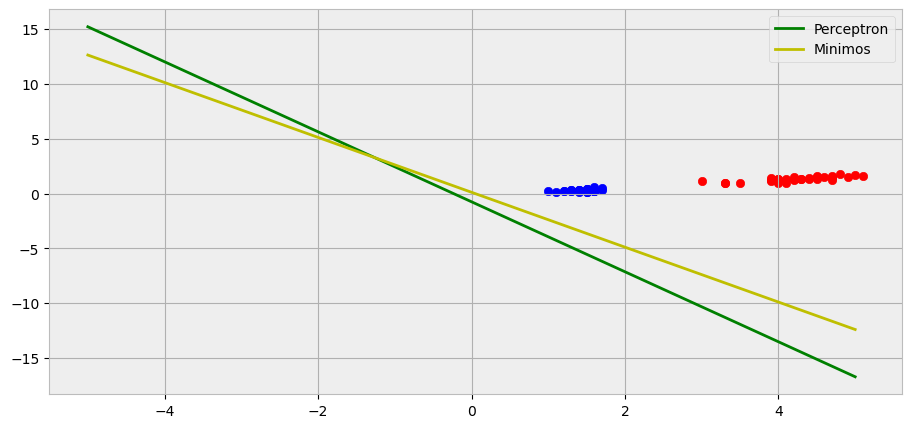

In [14]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(x_0, y_0,c="b")
ax.scatter(x_1, y_1,c="r")
ax.plot(X_P, Y_P,c="g",label="Perceptron")
ax.plot(X_M, Y_M,c="y",label="Minimos") 
plt.legend()

Ahora graficamos para nuestros datos de prueba

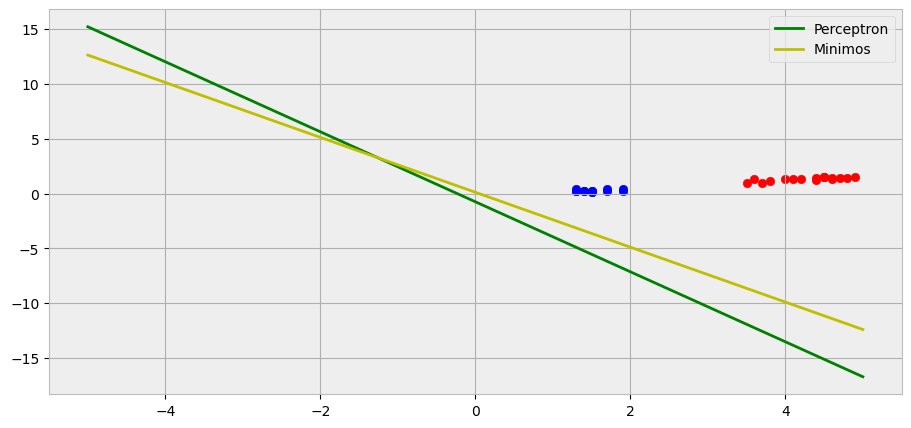

In [15]:
X_0=[]
X_1=[]
for i in datos_prueba:
    if i[2]==1:
        X_1.append(i)
    else:
        X_0.append(i)  
x_1=[]
y_1=[]
for i in X_1:
    x_1.append(i[0])  
for i in X_1:
    y_1.append(i[1])
x_0=[]
y_0=[]
for i in X_0:
    x_0.append(i[0])  
for i in X_0:
    y_0.append(i[1])     
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(x_0, y_0,c="b")
ax.scatter(x_1, y_1,c="r")
ax.plot(X_P, Y_P,c="g",label="Perceptron")
ax.plot(X_M, Y_M,c="y",label="Minimos") 
plt.legend()

# AYUDA

Como podemos ver en las graficas anteriores no estamos separando correctamente los datos.

Intente buscar el error pero al parecer no hay error en las cuentas de las funciones por lo que no se lo que realmente esta mal.

A continuacion sumamos una constate (8) a nuestra ecuación de la recta lo que nos hace ver que si se pueden separar los datos pero volvemos al mismo problema de no encontrar el error.

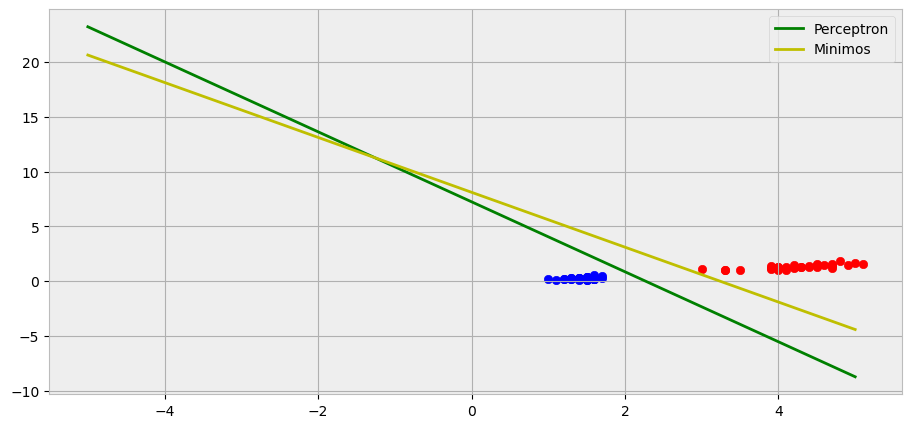

In [16]:
X_0=[]
X_1=[]
for i in datos_entrena:
    if i[2]==1:
        X_1.append(i)
    else:
        X_0.append(i)   
x_1=[]
y_1=[]
for i in X_1:
    x_1.append(i[0])  
for i in X_1:
    y_1.append(i[1])  
x_0=[]
y_0=[]
for i in X_0:
    x_0.append(i[0])  
for i in X_0:
    y_0.append(i[1])      
X_P=np.linspace(-5,5)
Y_P=-(P2.pesos[0]/(P2.pesos[2]))+8-(P2.pesos[1]*X_P)/(P2.pesos[2])    
X_M=np.linspace(-5,5)
Y_M=-(p_m[0]/p_m[2])+8-(p_m[1]*X_P)/(p_m[2])
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(x_0, y_0,c="b")
ax.scatter(x_1, y_1,c="r")
ax.plot(X_P, Y_P,c="g",label="Perceptron")
ax.plot(X_M, Y_M,c="y",label="Minimos") 
plt.legend()

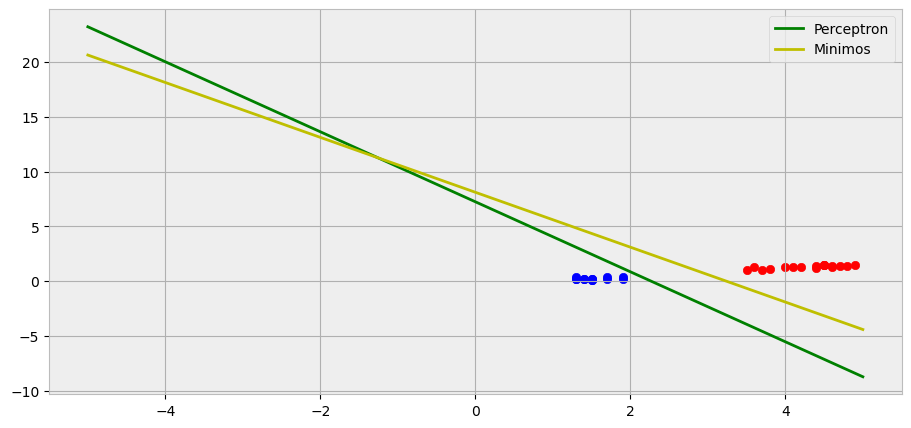

In [17]:
X_0=[]
X_1=[]
for i in datos_prueba:
    if i[2]==1:
        X_1.append(i)
    else:
        X_0.append(i)  
x_1=[]
y_1=[]
for i in X_1:
    x_1.append(i[0])  
for i in X_1:
    y_1.append(i[1])
x_0=[]
y_0=[]
for i in X_0:
    x_0.append(i[0])  
for i in X_0:
    y_0.append(i[1])     
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(x_0, y_0,c="b")
ax.scatter(x_1, y_1,c="r")
ax.plot(X_P, Y_P,c="g",label="Perceptron")
ax.plot(X_M, Y_M,c="y",label="Minimos") 
plt.legend()

In [18]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read() #or edit path to custom.css
    return HTML(styles)
css_styling()